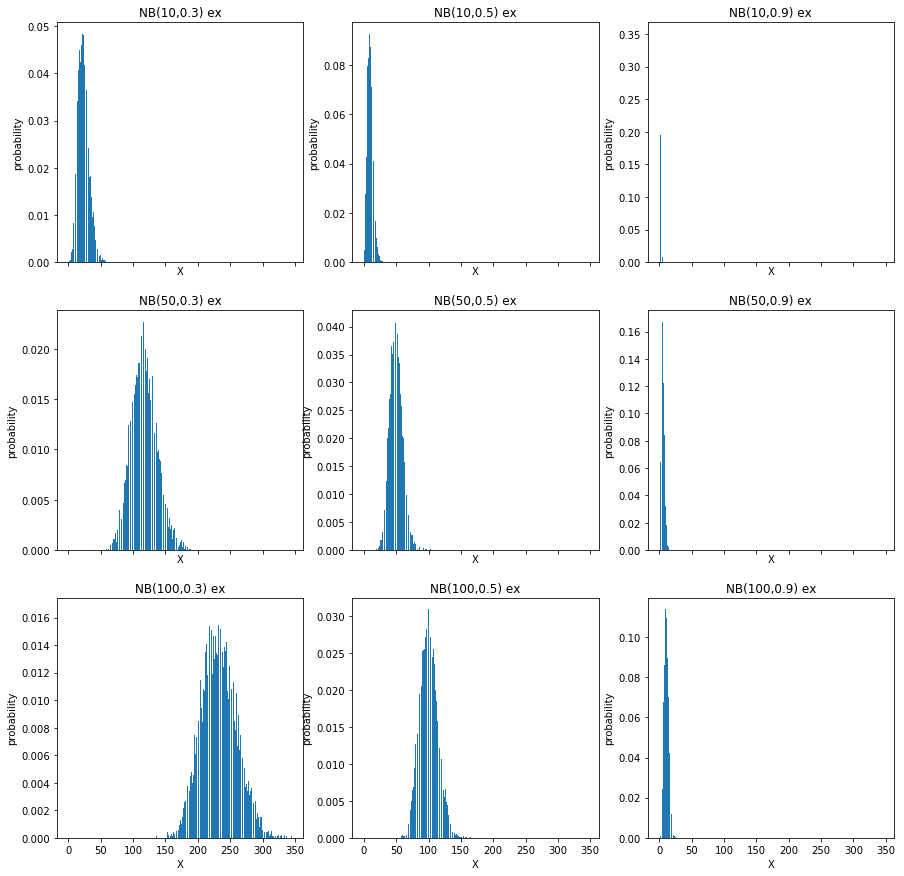

In [9]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb

#負の二項分布
#確率pで成功する試行を、k回成功するまでにx回失敗(x回試行)する(x軸)確率(y軸)分布。

#実験
def Negative_Binomial_EX(k,p):
    cnt_list = []
    for i in range(10000):
        cnt = 0
        total = 0
        while cnt != k:
            total += 1
            if np.random.rand() < p:
                cnt += 1
        cnt_list.append(total-cnt)
    freq = {i:0 for i in range(max(cnt_list)+1)}
    for num in cnt_list:
        freq[num] += 1    
    return max(cnt_list)+1,freq

#k = [10,50,100],p = [0.3,0.5,0.9]で実験
fig,axes = plt.subplots(ncols=3,nrows=3,figsize=(15,15),sharex=True)
for k,j in zip([10,50,100],range(3)):
    for p,i in zip([0.3,0.5,0.9],range(3)):
        x_max,freq = Negative_Binomial_EX(k,p)
        y = freq.values()
        y = list(map(lambda x:x/sum(y),y))
        axes[j,i].bar(list(range(x_max)),y,width=0.8)
        axes[j,i].set_title("NB({0},{1}) ex".format(k,p))
        axes[j,i].set_xlabel("X")
        axes[j,i].set_ylabel("probability")

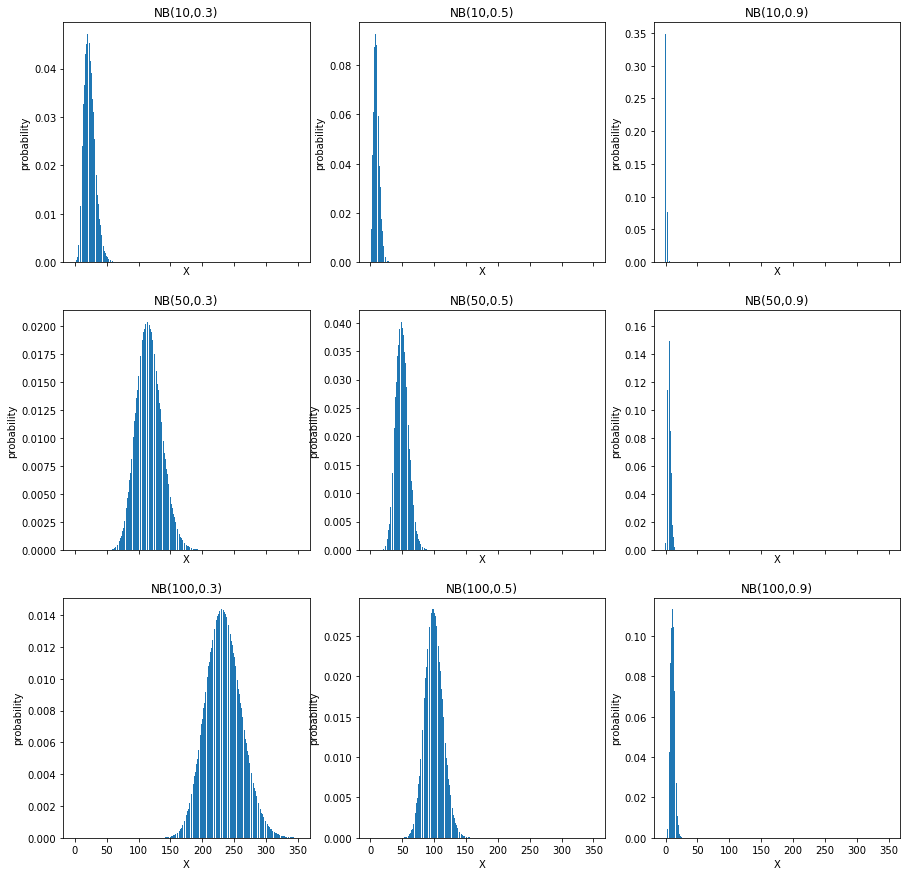

In [11]:
#理論
f = lambda k,p,x:comb(k+x-1,x) * (p**k) * ((1-p) ** x)
fig,axes = plt.subplots(ncols=3,nrows=3,figsize=(15,15),sharex=True)
for k,j in zip([10,50,100],range(3)):
    for p,i in zip([0.3,0.5,0.9],range(3)):
        y = list(map(f,[k]*(351),[p]*(351),list(range(351))))
        axes[j,i].bar(list(range(351)),y,width=0.8)
        axes[j,i].set_title("NB({0},{1})".format(k,p))
        axes[j,i].set_xlabel("X")
        axes[j,i].set_ylabel("probability")

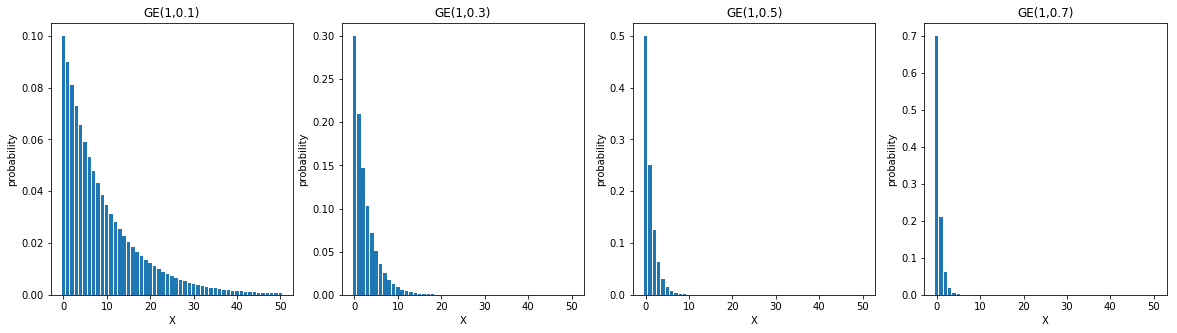

In [14]:
#幾何分布はk = 1の特別な場合。(要するに1回試行が成功するまでに何回失敗したか)
f = lambda k,p,x:comb(k+x-1,x) * (p**k) * ((1-p) ** x)
fig,axes = plt.subplots(ncols=4,figsize=(20,5),sharex=True)
for p,i in zip([0.1,0.3,0.5,0.7],range(4)):
    y = list(map(f,[1]*(51),[p]*(51),list(range(51))))
    axes[i].bar(list(range(51)),y,width=0.8)
    axes[i].set_title("GE(1,{})".format(p))
    axes[i].set_xlabel("X")
    axes[i].set_ylabel("probability")